<a href="https://colab.research.google.com/github/dunkelweizen/DS-Unit-2-Applied-Modeling/blob/master/Copy_of_assignment_applied_modeling_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Dec  4 21:11:16 2019

@author: caino
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

In [2]:
#%%explore and clean data


df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/thanksgiving-2015/thanksgiving-2015-poll-data.csv')



df.columns = ['ID', 'Celebrate', 'Main_Dish', 'Main_Dish_Other', 'Main_Dish_Cooked', 'Main_Dish_Cooked_Other', 'Stuffing',
              'Stuffing_Other', 'Cranberry_Sauce', 'Cranberry_Sauce_Other', 'Gravy', 'Brussel_Sprouts', 'Carrots', 'Cauliflower',
              'Corn', 'Cornbread', 'Fruit_Salad', 'Green_Beans', 'Mac_and_Cheese', 'Mashed_Potatoes', 'Rolls_Biscuits', 'Squash',
              'Salad', 'Sweet_Potatoes', 'Side_Dish_Other1', 'Side_Dish_Other2', 'Apple_Pie', 'Buttermilk_Pie', 'Cherry_Pie', 
              'Chocolate_Pie', 'Coconut_Cream_Pie', 'Key_Lime_Pie', 'Peach_Pie', 'Pecan_Pie', 'Pumpkin_Pie', 'Sweet_Potato_Pie', 
              'No_Pie', 'Other_Pie1', 'Other_Pie2', 'Apple_Cobbler', 'Blondies', 'Brownies', 'Carrot_Cake', 'Cheesecake', 'Cookies',
              'Fudge', 'Ice_Cream', 'Peach_Cobbler', 'No_Dessert', 'Other_Dessert1', 'Other_Dessert2', 'Prayer', 'Travel_Distance', 'Parade',
              'Kids_Table_Age', 'Old_Friends', 'Friendsgiving', 'Black_Friday_Shopper', 'Retail_Worker', 'Black_Friday_Worker', 'Neighborhood_Type',
              'Age', 'Gender', 'Household_Earnings', 'US_Region']

In [3]:
df.head()

ID Celebrate Main_Dish Main_Dish_Other Main_Dish_Cooked  \
0  4337954960       Yes    Turkey             NaN            Baked   
1  4337951949       Yes    Turkey             NaN            Baked   
2  4337935621       Yes    Turkey             NaN          Roasted   
3  4337933040       Yes    Turkey             NaN            Baked   
4  4337931983       Yes  Tofurkey             NaN            Baked   

  Main_Dish_Cooked_Other     Stuffing Stuffing_Other         Cranberry_Sauce  \
0                    NaN  Bread-based            NaN                    None   
1                    NaN  Bread-based            NaN  Other (please specify)   
2                    NaN   Rice-based            NaN                Homemade   
3                    NaN  Bread-based            NaN                Homemade   
4                    NaN  Bread-based            NaN                  Canned   

             Cranberry_Sauce_Other  ... Old_Friends Friendsgiving  \
0                              NaN  ...         Yes            No   
1  Homemade cranberry gelatin ring  ...          No            No   
2                              NaN  ...         Yes           Yes   
3                              NaN  ...         Yes            No   
4                              NaN  ...         Yes            No   

  Black_Friday_Shopper Retail_Worker Black_Friday_Worker Neighborhood_Type  \
0                   No            No                 NaN          Suburban   
1                  Yes            No                 NaN             Rural   
2                  Yes            No                 NaN          Suburban   
3                   No            No                 NaN             Urban   
4                   No            No                 NaN             Urban   

       Age  Gender    Household_Earnings           US_Region  
0  18 - 29    Male    $75,000 to $99,999     Middle Atlantic  
1  18 - 29  Female    $50,000 to $74,999  East South Central  
2  18 - 29    Male          $0 to $9,999            Mountain  
3  30 - 44    Male       $200,000 and up             Pacific  
4  30 - 44    Male  $100,000 to $124,999             Pacific  

[5 rows x 65 columns]

In [4]:
import re #this is your regex library

In [5]:
df['Brussel_Sprouts'].iloc[1]

nan

In [6]:
df['Brussel_Sprouts'].head()

0                NaN
1                NaN
2    Brussel sprouts
3    Brussel sprouts
4    Brussel sprouts
Name: Brussel_Sprouts, dtype: object

In [7]:
side_dishes = ['Stuffing',
              'Stuffing_Other', 'Cranberry_Sauce', 'Cranberry_Sauce_Other', 'Gravy', 'Brussel_Sprouts', 'Carrots', 'Cauliflower',
              'Corn', 'Cornbread', 'Fruit_Salad', 'Green_Beans', 'Mac_and_Cheese', 'Mashed_Potatoes', 'Rolls_Biscuits', 'Squash',
              'Salad', 'Sweet_Potatoes', 'Side_Dish_Other1', 'Side_Dish_Other2', 'Apple_Pie', 'Buttermilk_Pie', 'Cherry_Pie', 
              'Chocolate_Pie', 'Coconut_Cream_Pie', 'Key_Lime_Pie', 'Peach_Pie', 'Pecan_Pie', 'Pumpkin_Pie', 'Sweet_Potato_Pie', 
              'No_Pie', 'Other_Pie1', 'Other_Pie2', 'Apple_Cobbler', 'Blondies', 'Brownies', 'Carrot_Cake', 'Cheesecake', 'Cookies',
              'Fudge', 'Ice_Cream', 'Peach_Cobbler', 'No_Dessert', 'Other_Dessert1', 'Other_Dessert2']

vegetables = ['Brussel_Sprouts', 'Carrots', 'Cauliflower', 'Corn', 'Green_Beans',
              'Squash', 'Salad']
starches = ['Stuffing', 'Cornbread', 'Mac_and_Cheese', 'Mashed_Potatoes', 'Rolls_Biscuits',
            'Sweet_Potatoes']
sweet_sides = ['Cranberry_Sauce', 'Fruit_Salad']
desserts = ['Apple_Pie', 'Buttermilk_Pie', 'Cherry_Pie', 
              'Chocolate_Pie', 'Coconut_Cream_Pie', 'Key_Lime_Pie', 'Peach_Pie', 
               'Pecan_Pie', 'Pumpkin_Pie', 'Sweet_Potato_Pie',
            'Apple_Cobbler', 
               'Blondies', 'Brownies', 'Carrot_Cake', 'Cheesecake', 'Cookies',
              'Fudge', 'Ice_Cream', 'Peach_Cobbler']
pies = ['Apple_Pie', 'Buttermilk_Pie', 'Cherry_Pie', 
              'Chocolate_Pie', 'Coconut_Cream_Pie', 'Key_Lime_Pie', 'Peach_Pie', 
               'Pecan_Pie', 'Pumpkin_Pie', 'Sweet_Potato_Pie']
food = ['Stuffing', 'Cranberry_Sauce', 'Gravy', 'Brussel_Sprouts', 'Carrots', 'Cauliflower',
       'Corn', 'Cornbread', 'Fruit_Salad', 'Green_Beans', 'Mac_and_Cheese',
       'Mashed_Potatoes', 'Rolls_Biscuits', 'Squash', 'Salad',
       'Sweet_Potatoes', 'Apple_Pie', 'Buttermilk_Pie', 'Cherry_Pie',
       'Chocolate_Pie', 'Coconut_Cream_Pie', 'Key_Lime_Pie', 'Peach_Pie',
       'Pecan_Pie', 'Pumpkin_Pie', 'Sweet_Potato_Pie', 'No_Pie',
       'Apple_Cobbler', 'Blondies', 'Brownies', 'Carrot_Cake', 'Cheesecake',
       'Cookies', 'Fudge', 'Ice_Cream', 'Peach_Cobbler']
number_of_sides = ['Number_Vegetables', 'Number_Desserts',
       'Number_Starches', 'Number_Pies', 'Number_Sweet_Sides', 'Number_Dishes']
food_and_number = food + number_of_sides

In [8]:
df['US_Region'].isnull().sum()

59

In [9]:
df['Main_Dish'].value_counts(normalize=True)

Turkey                    0.881930
Other (please specify)    0.035934
Ham/Pork                  0.029774
Tofurkey                  0.020534
Chicken                   0.012320
Roast beef                0.011294
I don't know              0.005133
Turducken                 0.003080
Name: Main_Dish, dtype: float64

In [10]:
df['Main_Dish_Cooked'].value_counts(normalize=True)

Baked                     0.493840
Roasted                   0.388090
Other (please specify)    0.052361
Fried                     0.048255
I don't know              0.017454
Name: Main_Dish_Cooked, dtype: float64

In [80]:
df['Cranberry_Sauce'].value_counts()

Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
Name: Cranberry_Sauce, dtype: int64

In [107]:
 

#%% create data wrangling function

def wrangle(df):
    #remove rows without a region given
    df = df.dropna(subset=['US_Region'])
    #get rid of any rows where they don't celebrate
    df = df.drop(df[df.Celebrate == 'No'].index)
    df = df.drop('Celebrate', axis = 1)
    #remove earnings, is creating a map of earning potential by region rather than anything to do with food
    df = df.drop('Household_Earnings', axis=1)
    #Simplifying the regions in order to increase model accuracy
    df['US_Region'] = df['US_Region'].apply(lambda x : 'Pacific' if ((x == 'Pacific') | (x == 'Mountain')) else x)
    df['US_Region'] = df['US_Region'].apply(lambda x : 'Northeast' if ((x == 'New England') | (x == 'Middle Atlantic')) else x)
    df['US_Region'] = df['US_Region'].apply(lambda x : 'Midwest' if ((x == 'East South Central') | (x == 'East North Central')) else x)
#removing the 'Other' side dish columns for simplicities' sake
    for column in df.columns:
        if 'Other' in column:
            df = df.drop(column, axis=1)
    df['Number_Vegetables'] = df[vegetables].count(axis=1)
    df['Number_Starches'] = df[starches].count(axis=1)
    df['Number_Desserts'] = df[desserts].count(axis=1)
    df['Number_Pies'] = df[pies].count(axis=1)
    df['Number_Sweet_Sides'] = df[sweet_sides].count(axis=1)
    df['Number_Dishes'] = df[food].count(axis=1)
    #data is formatted so that a column has the name of the dish if true and NaN if false
#so replace all the NaN with No and all values with Yes
#also for Parade column
    for column in df.columns:
        if (column in side_dishes) & (column != 'Cranberry_Sauce'):
            df[column] = df[column].replace(r'.*', 'Yes', regex=True)
            df[column] = df[column].fillna('No')
        elif column == 'Cranberry_Sauce':
            df[column] = df[column].fillna('None')
        elif column == 'Parade':
            df[column] = df[column].replace(r'.*', 'Yes', regex=True)
            df[column] = df[column].fillna('No')
    df = df.replace('YesYes', 'Yes')
#simplify main dish options
    main_dishes = ('Turkey', 'Ham/Pork', 'Tofurkey', 'Chicken')
    df['Main_Dish'] = df['Main_Dish'].apply(lambda x : x if x in main_dishes else 'Other')
    cook_options = ('Baked', 'Roasted', 'Fried')
    df['Main_Dish_Cooked'] = df['Main_Dish_Cooked'].apply(lambda x : x if x in cook_options else 'Other')
#remove the ID column, it's meaningless
    df = df.drop('ID', axis=1)
#remove 'Neighborhood_Type' as it is a potential data leak
    df = df.drop('Neighborhood_Type', axis=1)
#replace empty values in Black_Friday_Worker with 'No' if person isn't in retail
    for i in range(len(df)):
        if df['Retail_Worker'].iloc[i] == 'No':
            df['Black_Friday_Worker'].iloc[i] = 'No'

#fix NaN values in other columns
    df['Kids_Table_Age'] = df['Kids_Table_Age'].fillna('No Kids Table')
    mode = df['Age'].mode()[0]
    df['Age'] = df['Age'].fillna(mode)
    mode = df['Travel_Distance'].mode()[0]
    df['Travel_Distance'] = df['Travel_Distance'].fillna(mode)
    df = df.fillna('Other')
    return df

In [12]:

#%% creating X and y
def X_y_dataframes(train, test, target):
    X_train = train.drop(target, axis=1)
    X_test = test.drop(target, axis=1)
    y_train = train[target]
    y_test = test[target]
    #ordinal encoding
    encoder = OrdinalEncoder()
    X_train_encoded = encoder.fit_transform(X_train)
    X_test_encoded = encoder.fit_transform(X_test)
    #converting encoded arrays back to dataframes
    X_train_encoded = pd.DataFrame(X_train_encoded)
    X_train_encoded.columns = X_train.columns
    X_test_encoded = pd.DataFrame(X_test_encoded)
    X_test_encoded.columns = X_test.columns
    return X_train_encoded, X_test_encoded, y_train, y_test

In [13]:

#%% leave one out validation
def loocv(X_train_encoded, y_train, model):
    num_folds = 10
    num_instances = len(X_train_encoded)
    loocv = LeaveOneOut()
    results = cross_val_score(model, X_train_encoded, y_train, cv=loocv)
    print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


In [113]:
def select_features(X_train_encoded, y_train, num_features, classifier):
    rfe_selector = RFE(estimator=classifier, n_features_to_select=num_features, step=10)
    rfe_selector.fit(X_train_encoded, y_train)
    rfe_support = rfe_selector.get_support()
    rfe_feature = X_train_encoded.loc[:,rfe_support].columns.tolist()
    print(str(len(rfe_feature)), 'selected features')
    print(rfe_feature)
    return rfe_feature

In [108]:
#%%splitting data

train, test = train_test_split(df)
train = wrangle(train)
test = wrangle(test)


In [109]:
train.head(10).T

801  \
Main_Dish                                                        Turkey   
Main_Dish_Cooked                                                  Fried   
Stuffing                                                            Yes   
Cranberry_Sauce                                                  Canned   
Gravy                                                               Yes   
Brussel_Sprouts                                                      No   
Carrots                                                              No   
Cauliflower                                                          No   
Corn                                                                 No   
Cornbread                                                            No   
Fruit_Salad                                                          No   
Green_Beans                                                         Yes   
Mac_and_Cheese                                                       No   
Mashed_Potatoes                                                     Yes   
Rolls_Biscuits                                                      Yes   
Squash                                                               No   
Salad                                                                No   
Sweet_Potatoes                                                      Yes   
Apple_Pie                                                            No   
Buttermilk_Pie                                                       No   
Cherry_Pie                                                           No   
Chocolate_Pie                                                       Yes   
Coconut_Cream_Pie                                                    No   
Key_Lime_Pie                                                         No   
Peach_Pie                                                            No   
Pecan_Pie                                                            No   
Pumpkin_Pie                                                         Yes   
Sweet_Potato_Pie                                                     No   
No_Pie                                                               No   
Apple_Cobbler                                                        No   
Blondies                                                             No   
Brownies                                                             No   
Carrot_Cake                                                          No   
Cheesecake                                                           No   
Cookies                                                              No   
Fudge                                                                No   
Ice_Cream                                                            No   
Peach_Cobbler                                                        No   
No_Dessert                                                          Yes   
Prayer                                                              Yes   
Travel_Distance       Thanksgiving is out of town but not too far--i...   
Parade                                                              Yes   
Kids_Table_Age                                              21 or older   
Old_Friends                                                          No   
Friendsgiving                                                        No   
Black_Friday_Shopper                                                 No   
Retail_Worker                                                        No   
Black_Friday_Worker                                                  No   
Age                                                             30 - 44   
Gender                                                             Male   
US_Region                                            West South Central   
Number_Vegetables                                                     1   
Number_Starches                                                       4   
Number_Desserts   

In [110]:
#%%
target = 'US_Region'
X_train_encoded, X_test_encoded, y_train, y_test = X_y_dataframes(train, test, target)

In [99]:
#%%Baseline model
print(y_train.value_counts(normalize=True))
baseline = 'South Atlantic'

South Atlantic        0.222701
Midwest               0.218391
Northeast             0.206897
Pacific               0.182471
West South Central    0.094828
West North Central    0.074713
Name: US_Region, dtype: float64


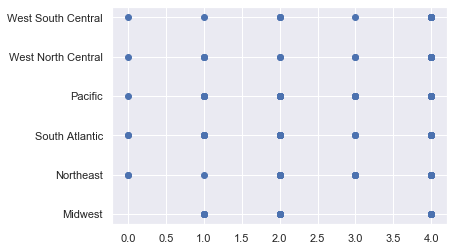

In [100]:
import matplotlib.pyplot as plt
plt.scatter(x=X_train_encoded['Main_Dish'], y=y_train)
plt.show();

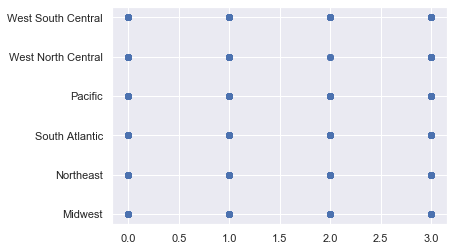

In [101]:
plt.scatter(x=X_train_encoded['Travel_Distance'], y=y_train)
plt.show();

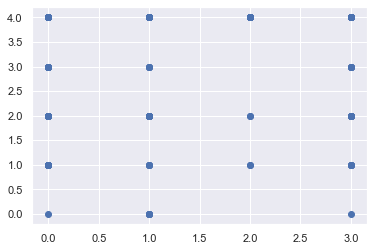

In [102]:
plt.scatter(x=X_train_encoded['Travel_Distance'], y=X_train_encoded['Main_Dish'])
plt.show();

In [22]:
#Logistic Regression Model

model = LogisticRegression(solver='lbfgs', max_iter = 10000, multi_class='auto')
model.fit(X_train_encoded, y_train)
loocv(X_train_encoded, y_train, model)
#26.6% accurate


Accuracy: 33.763% (47.290%)


In [114]:
#Random Forest Model

classifier = RandomForestClassifier(n_estimators=100)
features = select_features(X_train_encoded, y_train, 20, classifier)
X_train_encoded_new = X_train_encoded[features]
classifier.fit(X_train_encoded_new, y_train)
loocv(X_train_encoded_new, y_train, classifier)
#22.2% accurate


20 selected features
['Main_Dish_Cooked', 'Cranberry_Sauce', 'Corn', 'Fruit_Salad', 'Squash', 'Sweet_Potatoes', 'Apple_Pie', 'Prayer', 'Travel_Distance', 'Parade', 'Kids_Table_Age', 'Old_Friends', 'Friendsgiving', 'Age', 'Gender', 'Number_Vegetables', 'Number_Starches', 'Number_Desserts', 'Number_Pies', 'Number_Dishes']
Accuracy: 29.023% (45.387%)


Randomized Search for hyperparameters

In [25]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(results['mean_test_score'][candidate], results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [26]:
# specify parameters and distributions to sample from
param_dist = {'max_depth': range(10, 50, 2),
              'min_samples_leaf': [1,2,3,4,5],'min_samples_split': [2, 3, 4, 5],
              'n_estimators': range(100, 500, 10),
              "criterion": ["gini", "entropy"]}

n_iter_search = 25
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False, n_jobs=-1)

random_search.fit(X_train_encoded, y_train)

report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.329 (std: 0.017)
Parameters: {'n_estimators': 280, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 32, 'criterion': 'gini'}

Model with rank: 2
Mean validation score: 0.328 (std: 0.024)
Parameters: {'n_estimators': 270, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_depth': 40, 'criterion': 'gini'}

Model with rank: 3
Mean validation score: 0.328 (std: 0.018)
Parameters: {'n_estimators': 320, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 16, 'criterion': 'entropy'}



In [27]:
#Grid Search for hyperparameters

param_grid = {"max_depth": range(30, 50, 5),
              "n_estimators": range(100, 500, 10),
              "min_samples_leaf": range(2, 5)
              }

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=3, iid=False, n_jobs=-1)
grid_search.fit(X_train_encoded, y_train)
report(grid_search.cv_results_)

Model with rank: 1
Mean validation score: 0.349 (std: 0.027)
Parameters: {'max_depth': 40, 'min_samples_leaf': 2, 'n_estimators': 270}

Model with rank: 2
Mean validation score: 0.345 (std: 0.035)
Parameters: {'max_depth': 40, 'min_samples_leaf': 4, 'n_estimators': 380}

Model with rank: 3
Mean validation score: 0.343 (std: 0.034)
Parameters: {'max_depth': 30, 'min_samples_leaf': 4, 'n_estimators': 370}



In [ ]:
#updated forest model 
classifier = RandomForestClassifier(n_estimators=250, min_samples_split = 4, min_samples_leaf=4, max_depth=35,
                                    criterion='gini')
features = select_features(X_train_encoded, y_train, 10, classifier)
X_train_encoded_new = X_train_encoded[features]
classifier.fit(X_train_encoded_new, y_train)
loocv(X_train_encoded_new, y_train, classifier)


10 selected features
['Cranberry_Sauce', 'Squash', 'Travel_Distance', 'Kids_Table_Age', 'Age', 'Number_Vegetables', 'Number_Starches', 'Number_Desserts', 'Number_Pies', 'Number_Dishes']


In [ ]:
import xgboost
model = xgboost.XGBClassifier(n_jobs=-1)
features = select_features(X_train_encoded, y_train, 15, model)
X_train_encoded_new = X_train_encoded[features]
model.fit(X_train_encoded_new, y_train)


loocv(X_train_encoded_new, y_train, model)

In [30]:
from sklearn.metrics import precision_recall_fscore_support
y_pred_train = classifier.predict(X_train_encoded_new)
print(precision_recall_fscore_support(y_train, y_pred_train, average = 'weighted'))

(0.7932445763584256, 0.7668097281831188, 0.7515361251640784, None)


In [31]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.svm import SVC

svc = SVC().fit(X_train_encoded, y_train)
perm = PermutationImportance(svc).fit(X_train_encoded, y_train)
eli5.show_weights(perm)

C:\Users\caino\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [32]:
X_train_encoded.iloc[:,42]

0       8.0
1       0.0
2       2.0
3       0.0
4       0.0
       ... 
694    11.0
695     0.0
696     0.0
697     9.0
698     0.0
Name: Kids_Table_Age, Length: 699, dtype: float64

In [33]:
X_train_encoded.iloc[:,52]

0       3.0
1       4.0
2       4.0
3       3.0
4       1.0
       ... 
694    12.0
695     4.0
696     3.0
697     1.0
698     2.0
Name: Number_Desserts, Length: 699, dtype: float64

In [34]:
import plotly_express as px

%matplotlib inline
px.scatter(train, x='Main_Dish', y='US_Region', color='Main_Dish_Cooked');

In [35]:
px.scatter(train, x='Kids_Table_Age', y='US_Region', color='Main_Dish')

In [36]:
px.scatter(train, 'Main_Dish', 'US_Region', facet_col='Main_Dish_Cooked', color='Gravy')

In [37]:
from pdpbox.pdp import pdp_isolate, pdp_plot

In [38]:
feature = 'Number_Desserts'

isolated = pdp_isolate(
    model = model,
    dataset = X_train_encoded_new,
    model_features = X_train_encoded_new.columns,
    feature = feature
)

(<Figure size 1080x1620 with 7 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x22176a11688>,
  'pdp_ax': [<matplotlib.axes._subplots.AxesSubplot at 0x22176f04c88>,
   <matplotlib.axes._subplots.AxesSubplot at 0x221770bfc08>]})

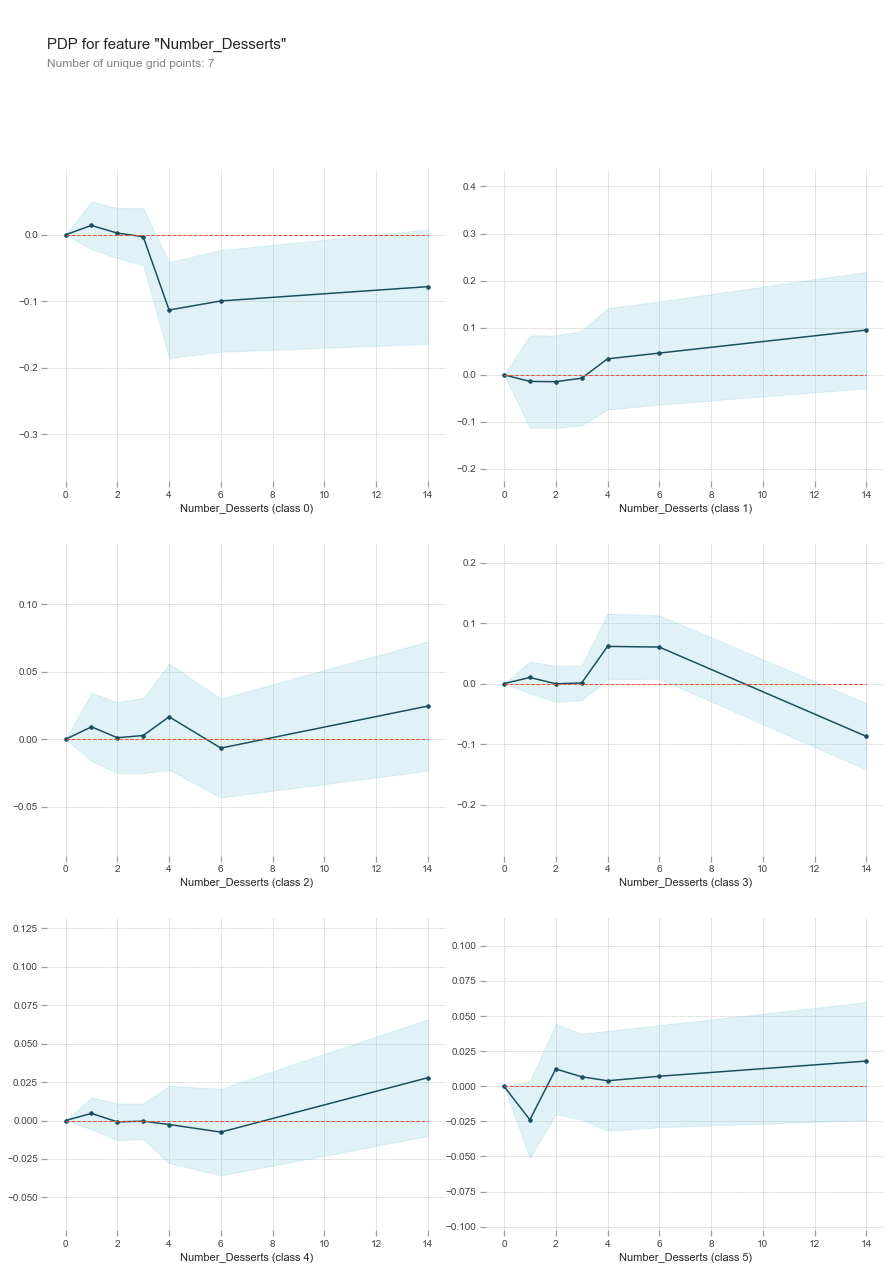

In [39]:
import seaborn as sns
sns.set()

pdp_plot(isolated, feature_name=feature)

(<Figure size 1080x1620 with 7 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x221771d2d08>,
  'pdp_ax': [<matplotlib.axes._subplots.AxesSubplot at 0x2217791d988>,
   <matplotlib.axes._subplots.AxesSubplot at 0x22177407608>]})

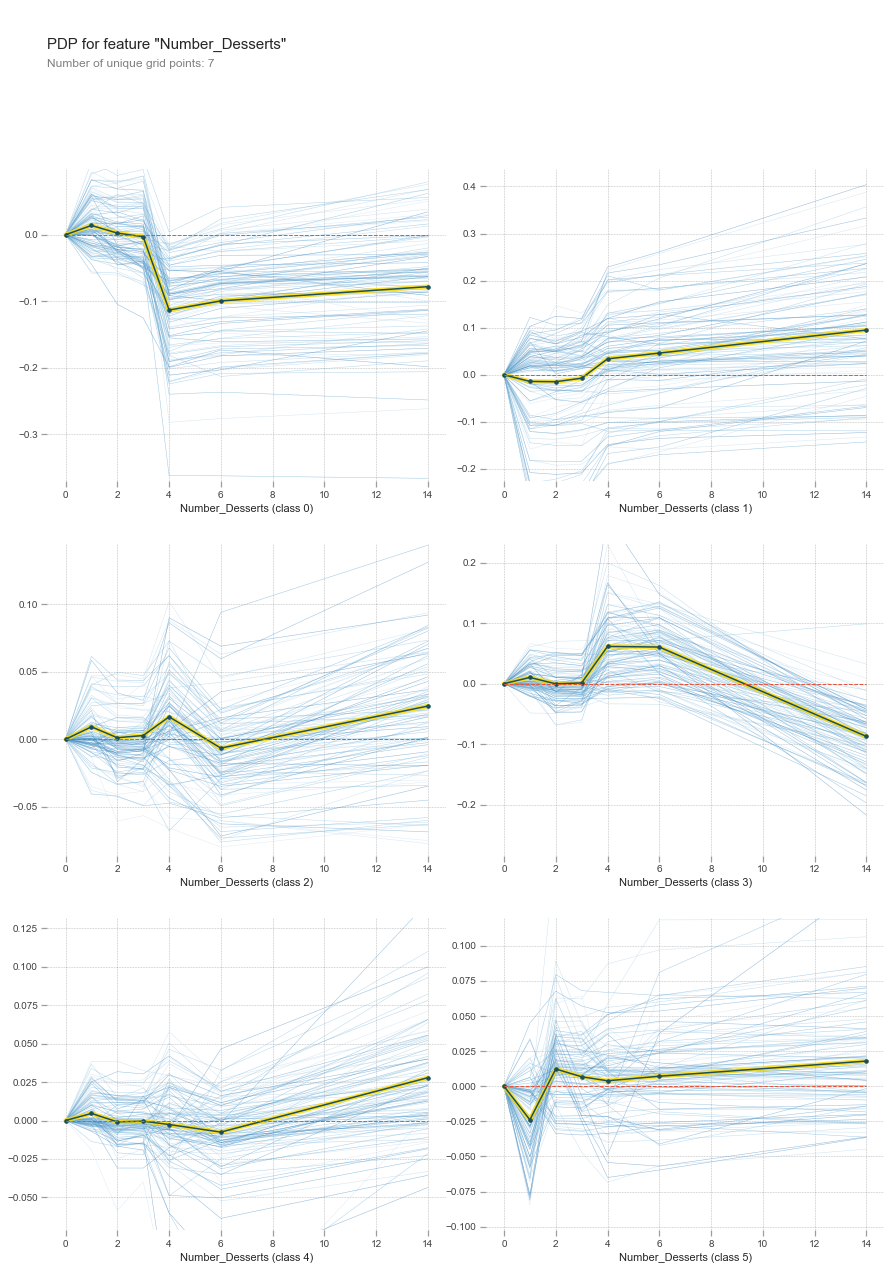

In [40]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100)

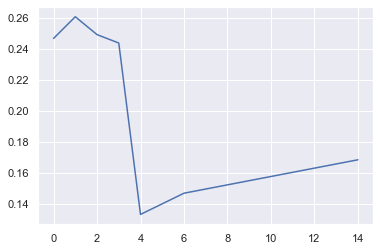

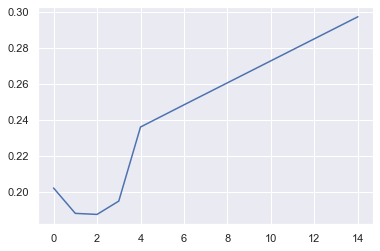

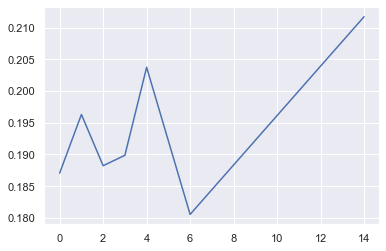

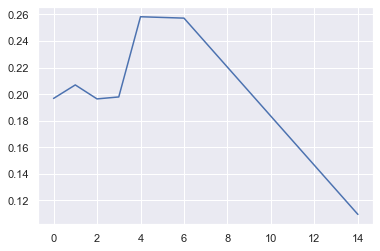

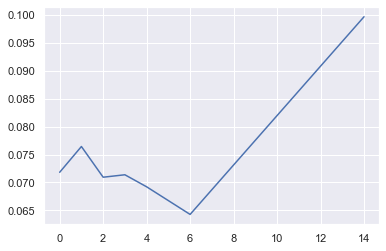

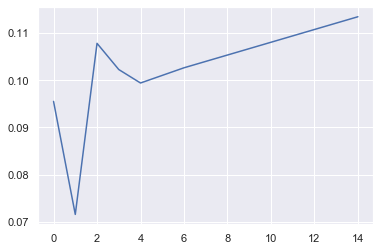

In [41]:
#creates pdp plot for each isolated item

for item in isolated:
    grid = item.feature_grids
    pdp = item.pdp
    lines = item.ice_lines.sample(100).T
    plt.plot(grid, pdp)
    plt.show()

In [42]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot
#creates plot that shows interaction between two features
features=['Number_Desserts','Kids_Table_Age']

interaction = pdp_interact(
    model=model,
    dataset=X_train_encoded_new,
    model_features=X_train_encoded_new.columns,
    features=features
)

(<Figure size 1080x1764 with 13 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x22178f24548>,
  'pdp_inter_ax': [<matplotlib.axes._subplots.AxesSubplot at 0x22178f5cb08>,
   <matplotlib.axes._subplots.AxesSubplot at 0x221790dfa48>]})

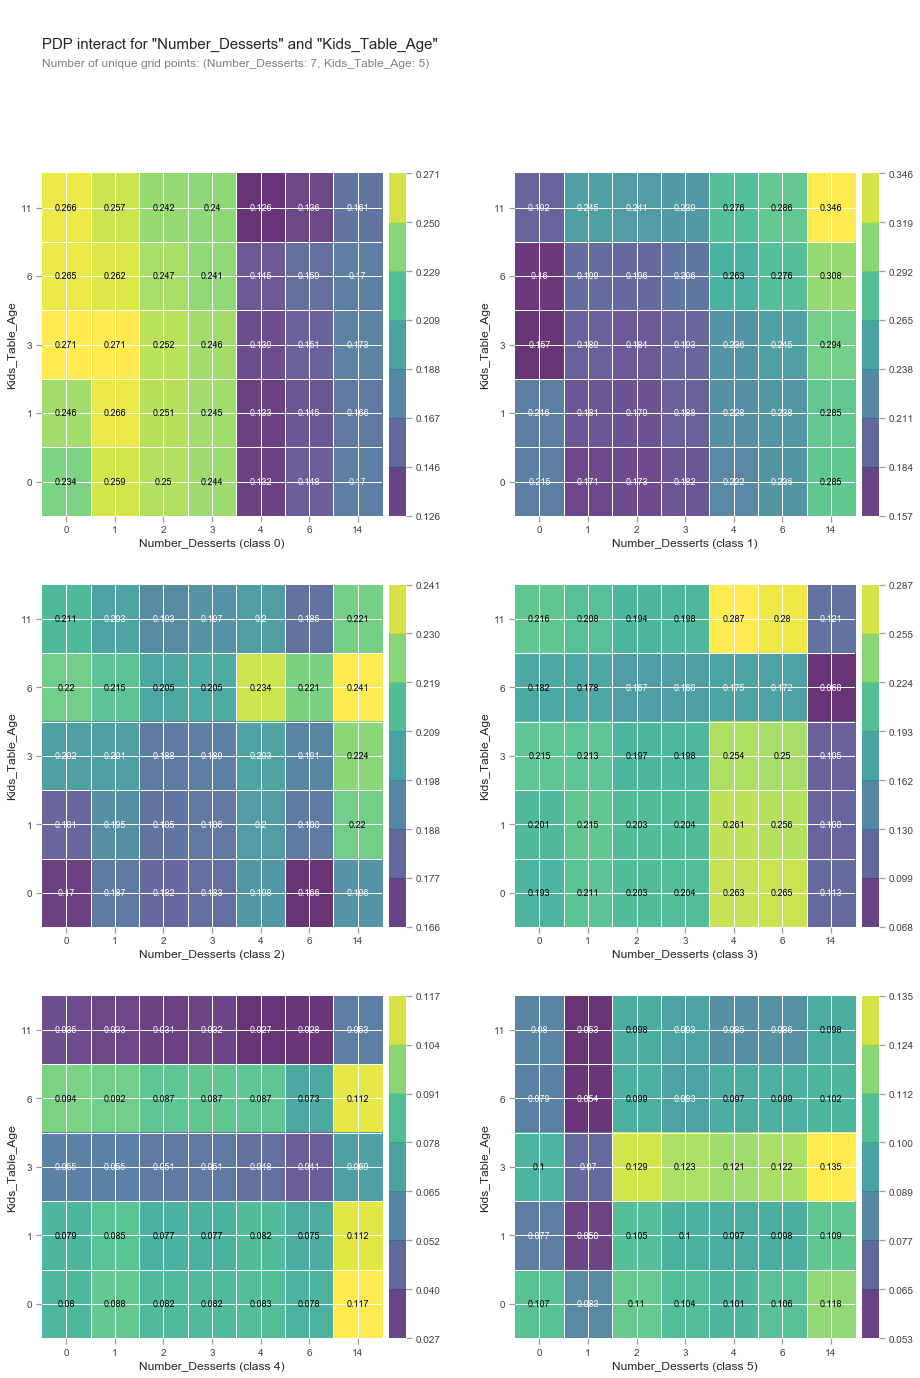

In [43]:
pdp_interact_plot(interaction, plot_type='grid', feature_names=features)

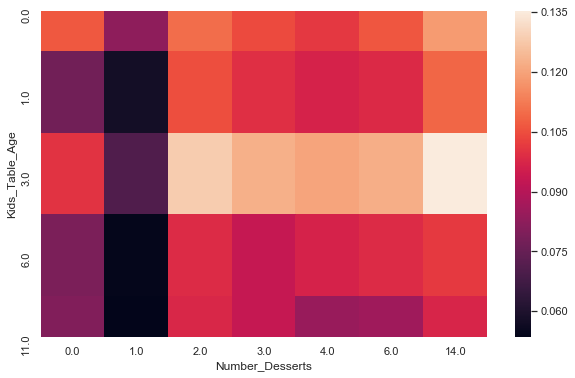

In [44]:
for item in interaction: 
    pdp = item.pdp.pivot_table(
        values='preds',
        columns=features[0],
        index=features[1]
)
plt.figure(figsize=(10,6))
sns.heatmap(pdp, fmt=0)

In [45]:
gb = model = xgboost.XGBClassifier(n_jobs=-1)
gb.fit(X_train_encoded, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

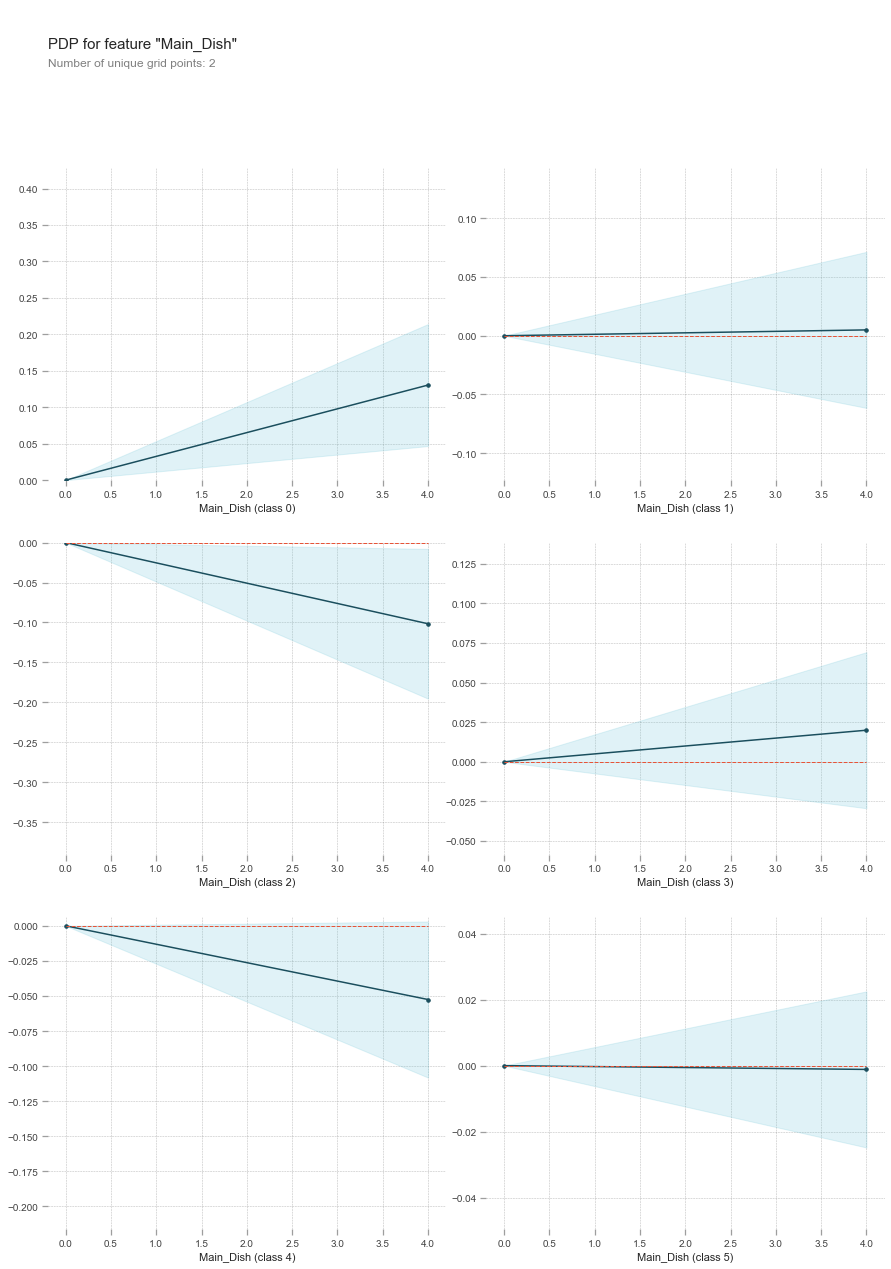

In [46]:
import matplotlib.pyplot as plt
from pdpbox import pdp

pdp_dist = pdp.pdp_isolate(model=gb, dataset=X_train_encoded, 
                           model_features=X_train_encoded.columns, feature='Main_Dish')
pdp.pdp_plot(pdp_dist, 'Main_Dish');

In [47]:
import category_encoders as ce

X_train = train.drop('US_Region', axis=1)

encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)

In [48]:
encoder.mapping

[{'col': 'Main_Dish', 'mapping': Turkey      1
  Tofurkey    2
  Other       3
  Ham/Pork    4
  Chicken     5
  NaN        -2
  dtype: int64, 'data_type': dtype('O')},
 {'col': 'Main_Dish_Cooked', 'mapping': Roasted    1
  Baked      2
  Other      3
  Fried      4
  NaN       -2
  dtype: int64, 'data_type': dtype('O')},
 {'col': 'Stuffing', 'mapping': Yes    1
  NaN   -2
  dtype: int64, 'data_type': dtype('O')},
 {'col': 'Cranberry_Sauce', 'mapping': Yes    1
  NaN   -2
  dtype: int64, 'data_type': dtype('O')},
 {'col': 'Gravy', 'mapping': Yes    1
  NaN   -2
  dtype: int64, 'data_type': dtype('O')},
 {'col': 'Brussel_Sprouts', 'mapping': No     1
  Yes    2
  NaN   -2
  dtype: int64, 'data_type': dtype('O')},
 {'col': 'Carrots', 'mapping': Yes    1
  No     2
  NaN   -2
  dtype: int64, 'data_type': dtype('O')},
 {'col': 'Cauliflower', 'mapping': No     1
  Yes    2
  NaN   -2
  dtype: int64, 'data_type': dtype('O')},
 {'col': 'Corn', 'mapping': No     1
  Yes    2
  NaN   -2
  dtype

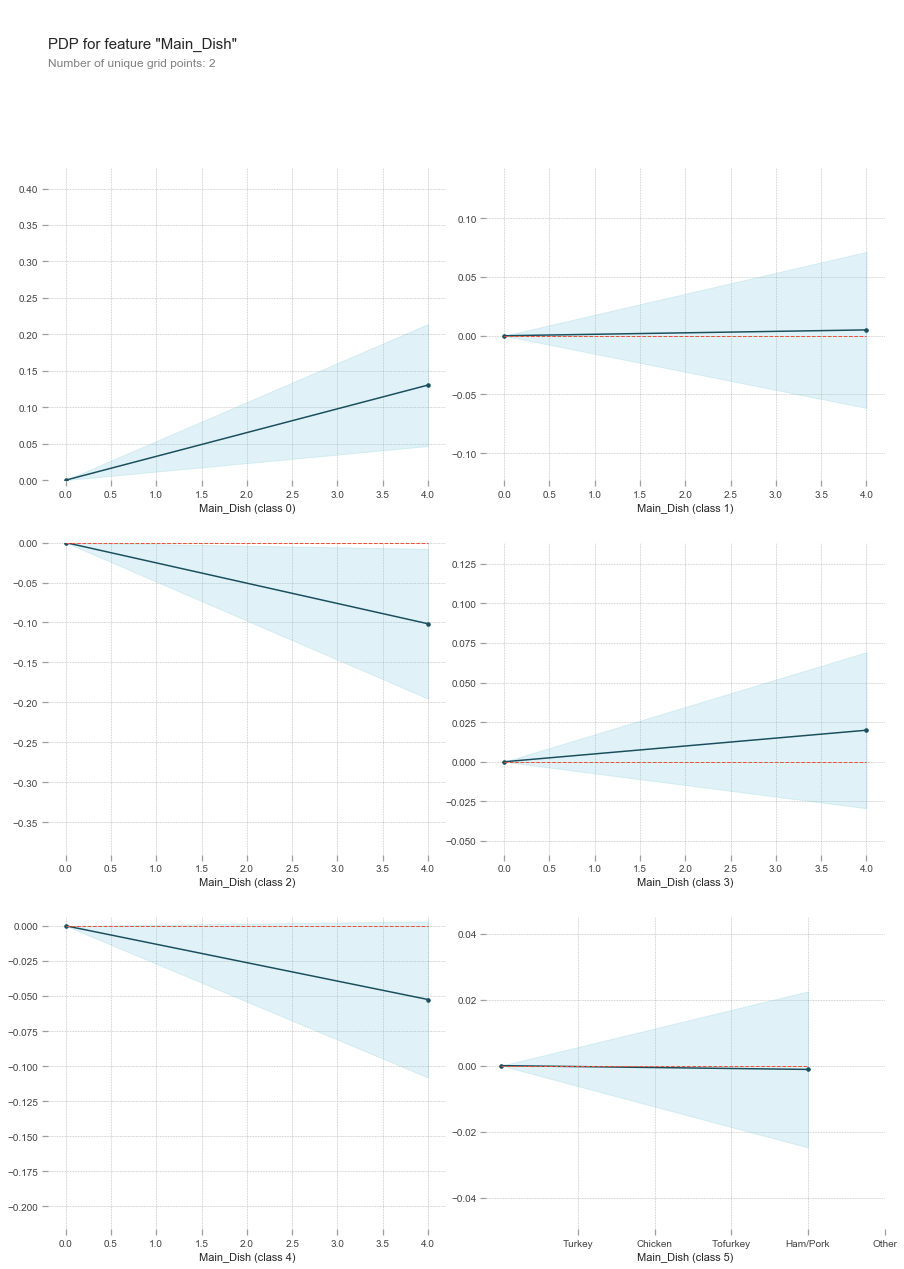

In [49]:
for plot in pdp.pdp_plot(pdp_dist, 'Main_Dish'):
    plt.xticks([1,2,3,4,5], ['Turkey', 'Chicken', 'Tofurkey', 'Ham/Pork','Other'])
plt.savefig('PDP_plot.png')

In [50]:
X_train_food = X_train_encoded[food_and_number]

In [51]:
X_train_food.head()

Stuffing  Cranberry_Sauce  Gravy  Brussel_Sprouts  Carrots  Cauliflower  \
611         1                1      1                1        1            1   
188         1                1      1                1        2            1   
701         1                1      1                1        2            1   
324         1                1      1                1        1            1   
423         1                1      1                1        2            1   

     Corn  Cornbread  Fruit_Salad  Green_Beans  ...  Cookies  Fudge  \
611     1          1            1            1  ...        1      1   
188     1          1            1            2  ...        1      1   
701     2          1            1            2  ...        1      1   
324     1          1            1            2  ...        1      1   
423     1          1            1            2  ...        1      1   

     Ice_Cream  Peach_Cobbler  Number_Vegetables  Number_Desserts  \
611          1              1                  1                3   
188          2              1                  2                4   
701          1              1                  2                4   
324          2              1                  3                3   
423          1              1                  1                1   

     Number_Starches  Number_Pies  Number_Sweet_Sides  Number_Dishes  
611                4            3                   1             10  
188                4            3                   1             12  
701                4            3                   1             12  
324                4            2                   1             12  
423                4            1                   1              8  

[5 rows x 42 columns]

In [52]:
model = xgboost.XGBClassifier(n_jobs=-1)
model.fit(X_train_food, y_train)


loocv(X_train_food, y_train, model)



Accuracy: 30.329% (45.968%)


In [53]:
perm = PermutationImportance(model).fit(X_train_food, y_train)
eli5.show_weights(perm)

In [54]:
X_train_food.iloc[:,37]

611     3
188     4
701     4
324     3
423     1
       ..
851    13
416     4
422     3
838     1
19      2
Name: Number_Desserts, Length: 699, dtype: int64

In [55]:
X_train_food.iloc[:,36]

611    1
188    2
701    2
324    3
423    1
      ..
851    5
416    4
422    0
838    2
19     2
Name: Number_Vegetables, Length: 699, dtype: int64

In [56]:
X_train_food.iloc[:,14]

611    1
188    2
701    1
324    2
423    1
      ..
851    2
416    1
422    1
838    1
19     1
Name: Salad, Length: 699, dtype: int32

In [57]:
len(food)

36

So I could use a 36 question quiz about the foods they had, engineer the number features, and try to predict where in the country they had Thanksgiving dinner based on that and be about 30% accurate

In [59]:
row = X_train_food.iloc[[10]]

In [68]:
model.predict(row)

array(['Pacific'], dtype=object)

In [69]:
y_train.iloc[[10]]

1035    Midwest
Name: US_Region, dtype: object

In [67]:
import shap


row = X_train_food.iloc[[30]]
explainer=shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[0],
    shap_values=shap_values[0],
    features=row,
    link='logit'               # For classification, this returns predicted probs
)

can I predict whether someone will have Turkey, Ham, or something else based on other items?

In [58]:
train['Main_Dish'].unique()
train['Main_Dish'].value_counts(normalize=True)


Turkey      0.892199
Other       0.043972
Ham/Pork    0.032624
Tofurkey    0.024113
Chicken     0.007092
Name: Main_Dish, dtype: float64

In [59]:
target = 'Main_Dish'
X_train_encoded, X_test_encoded, y_train, y_test = X_y_dataframes(train, test, target)

In [60]:
classifier = RandomForestClassifier(n_estimators=100)
features = select_features(X_train_encoded, y_train, 10)
X_train_encoded = X_train_encoded[features]
classifier.fit(X_train_encoded, y_train)
loocv(X_train_encoded, y_train, classifier)

Fitting estimator with 56 features.
Fitting estimator with 46 features.
Fitting estimator with 36 features.
Fitting estimator with 26 features.
Fitting estimator with 16 features.
10 selected features
['Main_Dish_Cooked', 'Travel_Distance', 'Kids_Table_Age', 'Age', 'US_Region', 'Number_Vegetables', 'Number_Starches', 'Number_Desserts', 'Number_Pies', 'Number_Dishes']
Accuracy: 88.794% (31.544%)


In [61]:
target = 'Main_Dish'
X_train_encoded, X_test_encoded, y_train, y_test = X_y_dataframes(train, test, target)
    

In [62]:
#use only food columns for model
X_train_food = X_train_encoded[food_and_number]

In [63]:
#logistic model
model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter = 10000)
model.fit(X_train_food, y_train)
loocv(X_train_food, y_train, model)

Accuracy: 88.511% (31.889%)


In [64]:
#Random Forest model
classifier = RandomForestClassifier(n_estimators=480, max_depth=45, min_samples_leaf=3)
features = select_features(X_train_food, y_train, 15)
X_train_encoded = X_train_food[features]
classifier.fit(X_train_food, y_train)
loocv(X_train_food, y_train, classifier)

Fitting estimator with 42 features.
Fitting estimator with 32 features.
Fitting estimator with 22 features.
15 selected features
['Brussel_Sprouts', 'Carrots', 'Corn', 'Green_Beans', 'Mashed_Potatoes', 'Salad', 'Sweet_Potatoes', 'Apple_Pie', 'Pecan_Pie', 'Pumpkin_Pie', 'Number_Vegetables', 'Number_Desserts', 'Number_Starches', 'Number_Pies', 'Number_Dishes']
Accuracy: 89.220% (31.013%)


In [65]:

y_pred_train = classifier.predict(X_train_food)
print(precision_recall_fscore_support(y_train, y_pred_train, average = 'weighted'))

(0.8422545726017171, 0.8950354609929078, 0.8479618883874203, None)


In [66]:
model = xgboost.XGBClassifier(n_jobs=-1)
model.fit(X_train_encoded, y_train)


loocv(X_train_encoded, y_train, model)

Accuracy: 89.078% (31.191%)
